# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# Loading the dataset

In [2]:
df = pd.read_csv(r"C:\Users\vasanth\Downloads\car.csv")

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


# Dataset Analysis

In [4]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [6]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [7]:
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())

In [8]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [9]:
df.drop_duplicates()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [10]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [11]:
df.dtypes.value_counts()

float64    4
int64      3
object     2
Name: count, dtype: int64

In [12]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       94
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

In [13]:
print("data rows --->",df.shape[0],"no's")
print("data columns -->",df.shape[1],"no's")

data rows ---> 398 no's
data columns --> 9 no's


In [14]:
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=['number']).columns

In [15]:
skewness = df[numerical_columns].skew()

In [16]:
skewness

mpg             0.457066
cylinders       0.526922
displacement    0.719645
horsepower      1.095552
weight          0.531063
acceleration    0.278777
model_year      0.011535
dtype: float64

In [17]:
variances = df[numerical_columns].var()

In [18]:
variances

mpg                 61.089611
cylinders            2.893415
displacement     10872.199152
horsepower        1459.177916
weight          717140.990526
acceleration         7.604848
model_year          13.672443
dtype: float64

# EDA Analysis

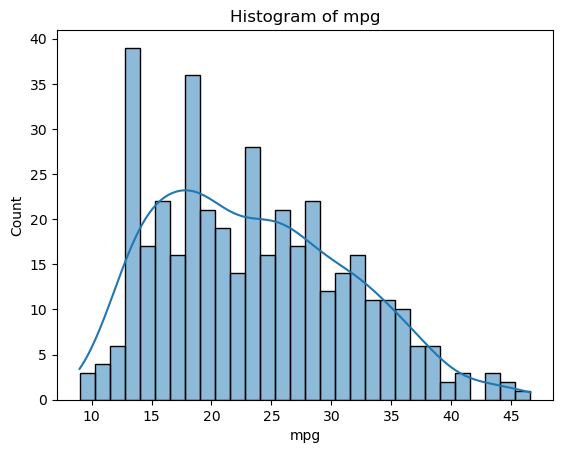

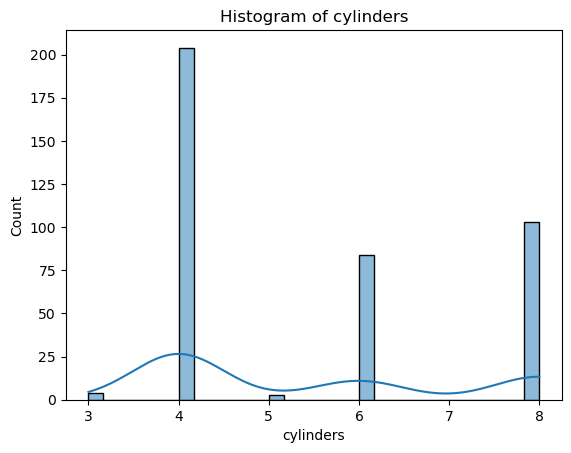

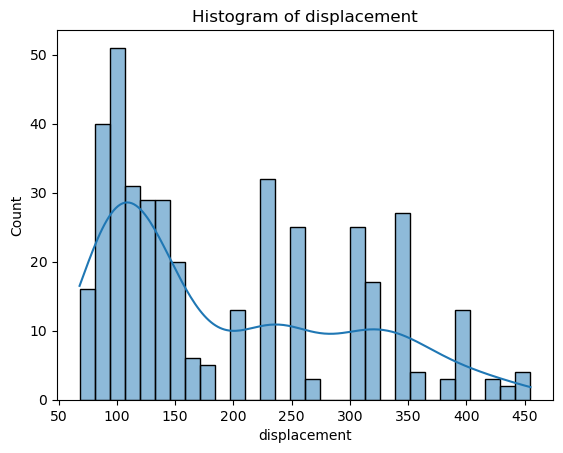

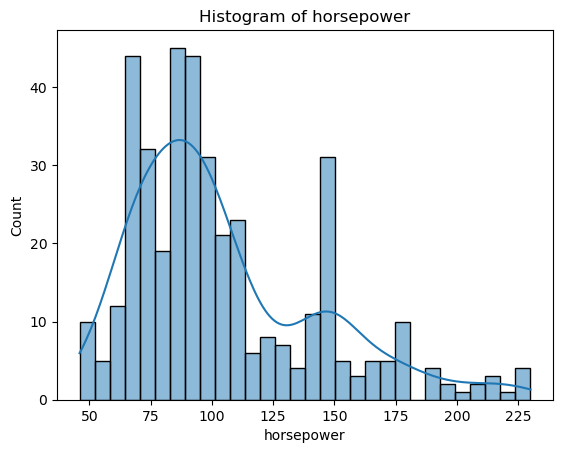

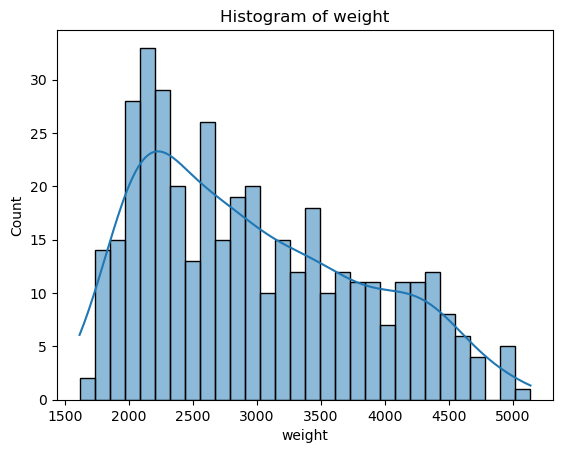

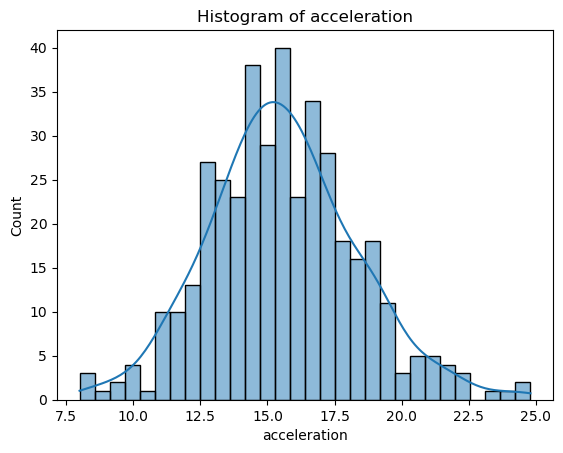

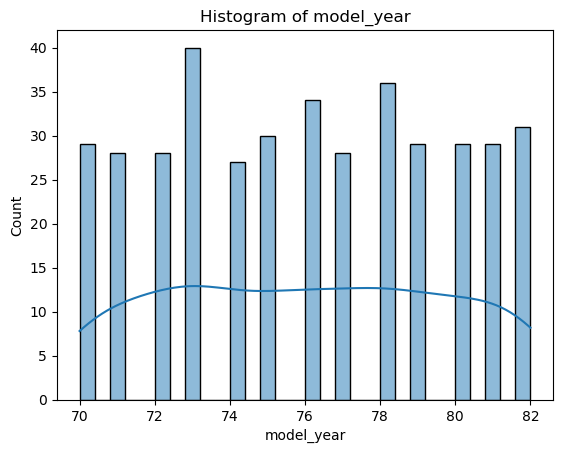

In [19]:
import seaborn as sns
for col in numerical_columns:
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Histogram of {col}")
    plt.show()

C:\Users\vasanth\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


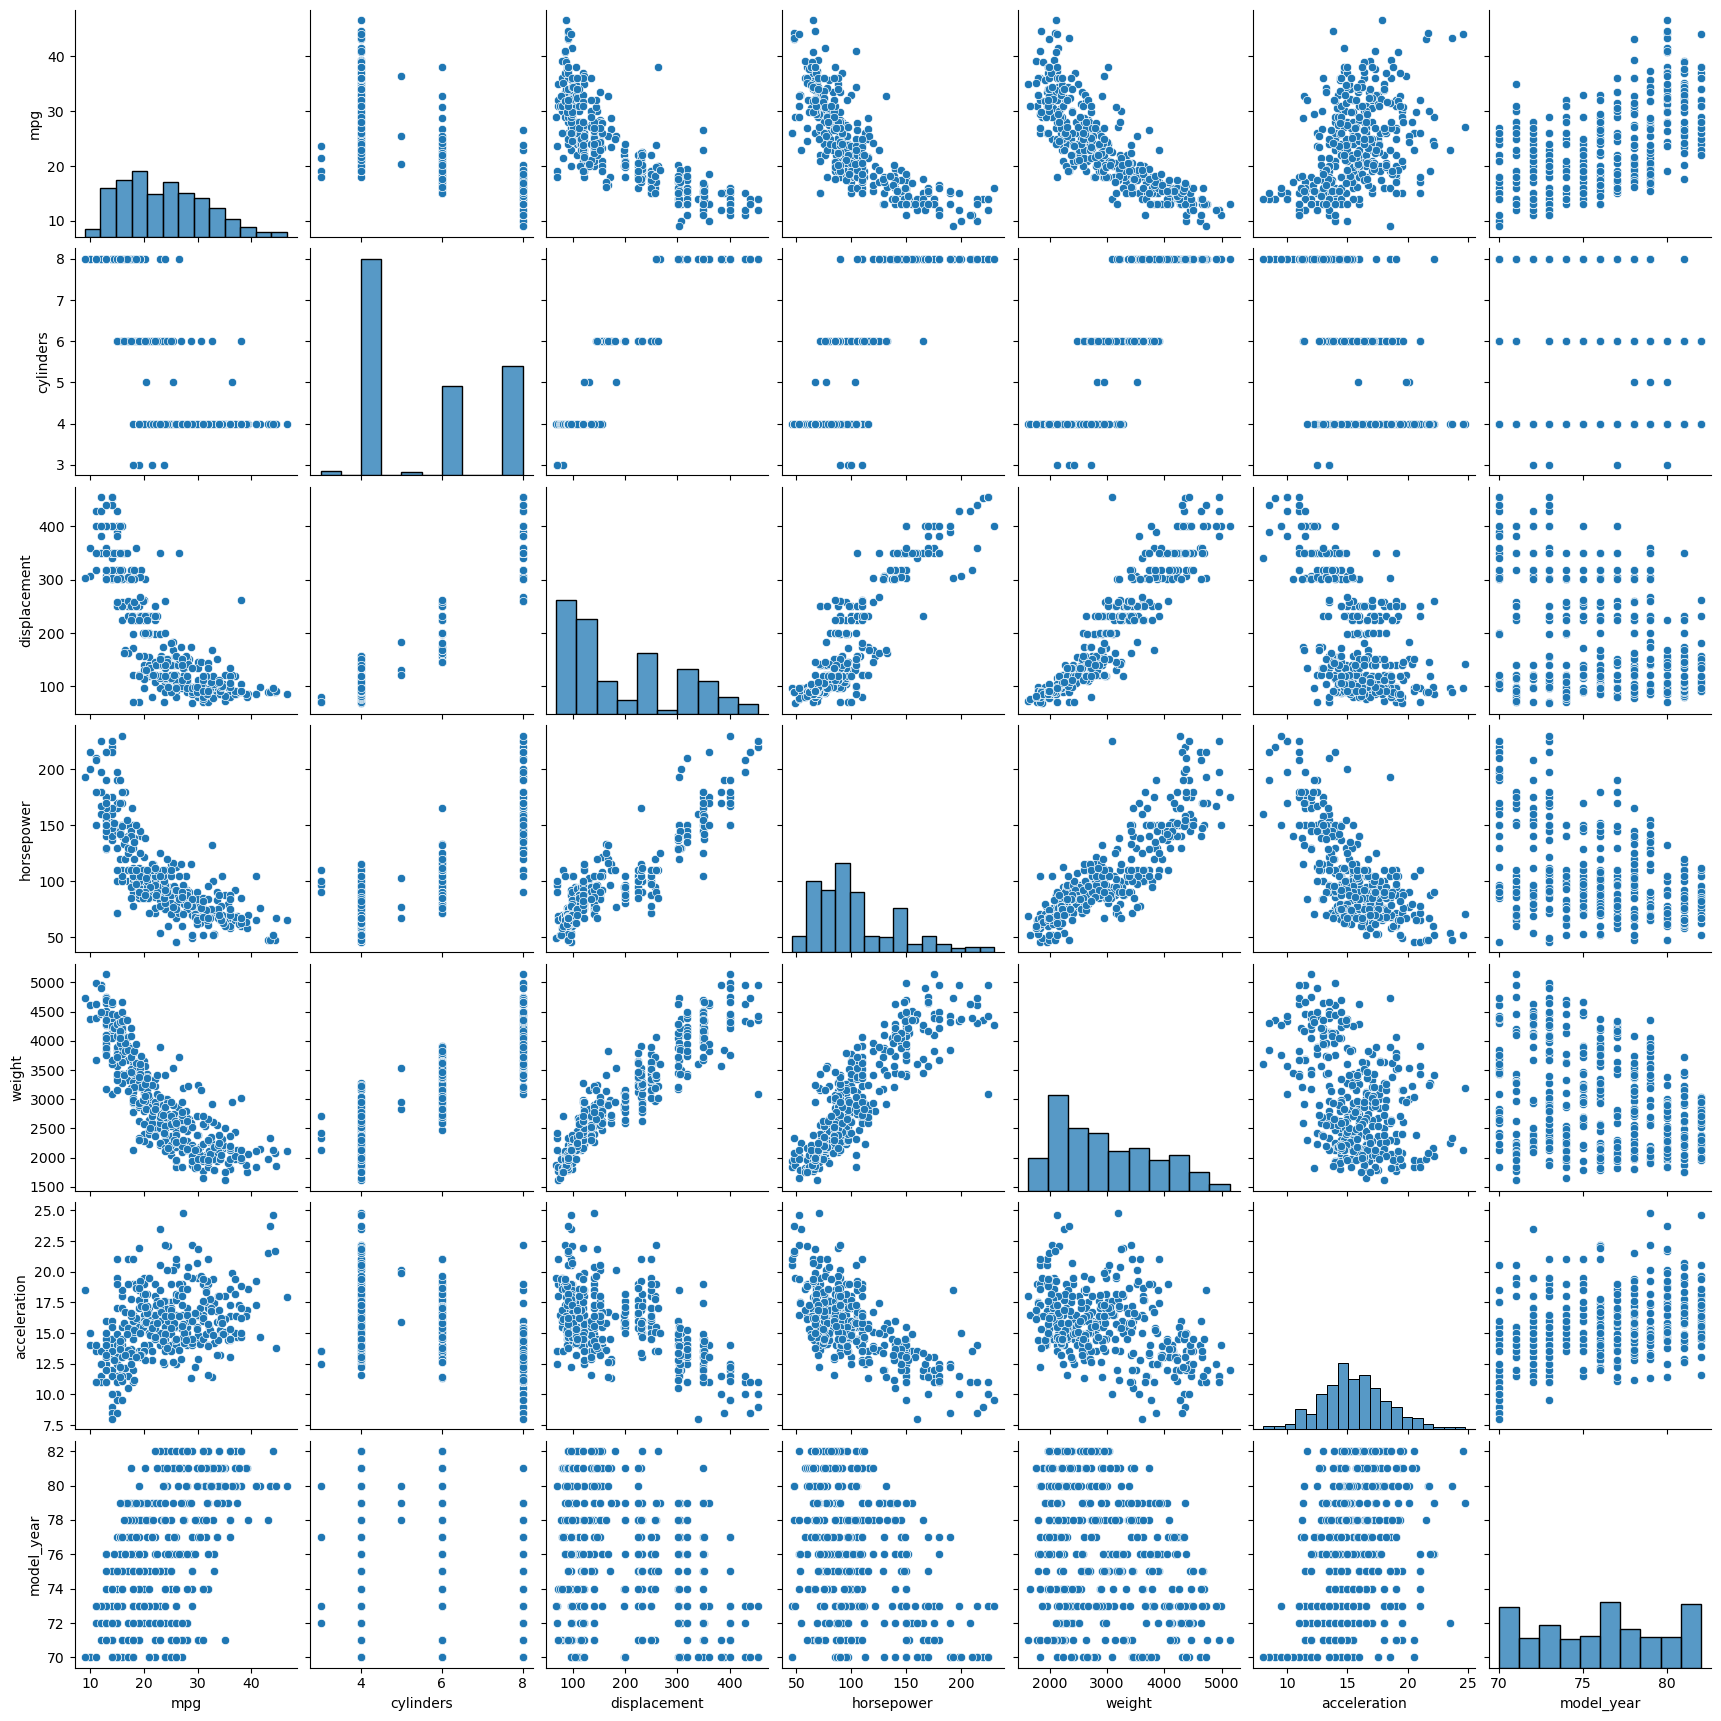

In [20]:
sns.pairplot(df[numerical_columns])
plt.show()

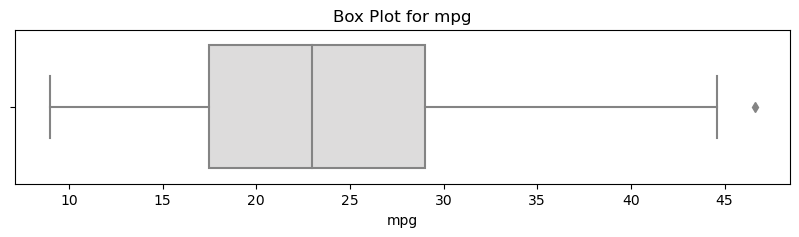

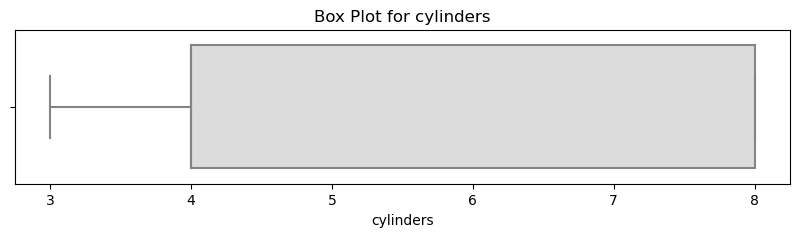

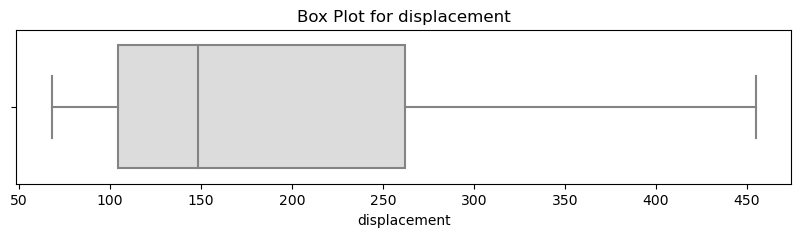

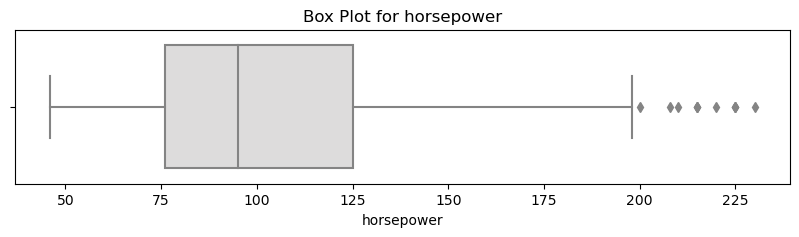

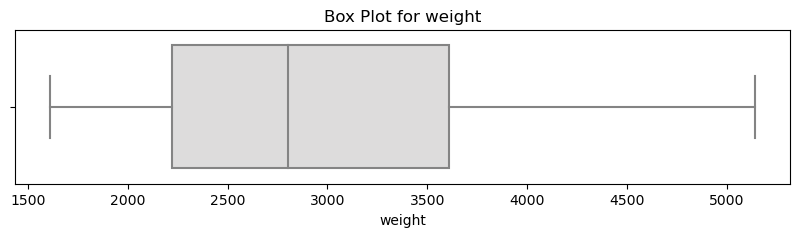

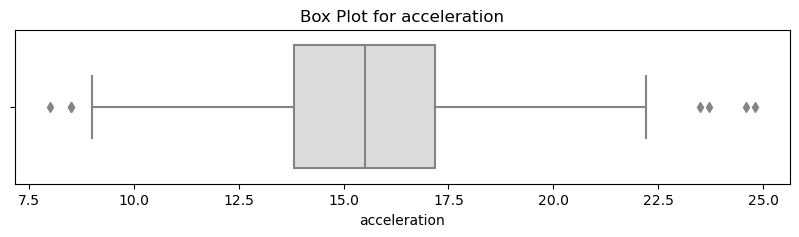

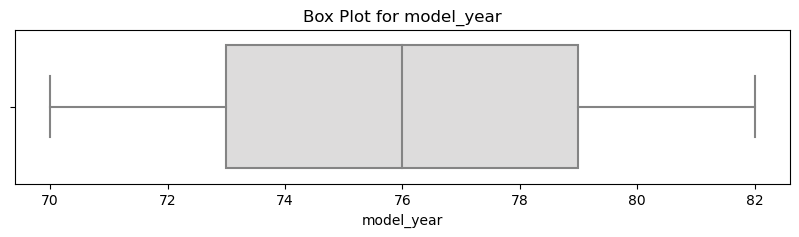

In [21]:
for col in numerical_columns:
    plt.figure(figsize=(10,2))
    sns.boxplot(data=df,x=col, palette='coolwarm')
    plt.title(f'Box Plot for {col}')
    plt.show()

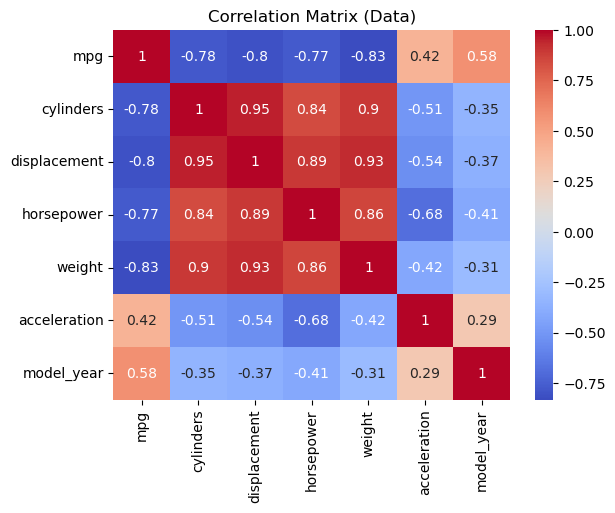

In [22]:
corr_matrix = df[numerical_columns].corr()
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Data)')
plt.show()


# Preprocessing

In [23]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [24]:
df = df.drop(columns=['name'], axis=1)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


In [25]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


In [26]:
#Define manual mapping
origin_mapping = {'usa': 0, 'europe': 1, 'japan': 2}

# Apply mapping
df['origin'] = df['origin'].map(origin_mapping)

In [27]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Convert 'origin' column to numeric
df['origin'] = label_encoder.fit_transform(df['origin'])

# Check the mapping
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

{0: 0, 1: 1, 2: 2}


In [28]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
df_standardized = StandardScaler().fit_transform(df)
df_normalized = MinMaxScaler().fit_transform(df)

In [29]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,0
1,15.0,8,350.0,165.0,3693,11.5,70,0
2,18.0,8,318.0,150.0,3436,11.0,70,0
3,16.0,8,304.0,150.0,3433,12.0,70,0
4,17.0,8,302.0,140.0,3449,10.5,70,0
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,0
394,44.0,4,97.0,52.0,2130,24.6,82,1
395,32.0,4,135.0,84.0,2295,11.6,82,0
396,28.0,4,120.0,79.0,2625,18.6,82,0


In [30]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,0.572864
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,0.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,0.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,1.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,2.000000


In [31]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,0
1,15.0,8,350.0,165.0,3693,11.5,70,0
2,18.0,8,318.0,150.0,3436,11.0,70,0
3,16.0,8,304.0,150.0,3433,12.0,70,0
4,17.0,8,302.0,140.0,3449,10.5,70,0
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,0
394,44.0,4,97.0,52.0,2130,24.6,82,1
395,32.0,4,135.0,84.0,2295,11.6,82,0
396,28.0,4,120.0,79.0,2625,18.6,82,0


In [32]:
# Separate features and target
X = df.drop(columns=['mpg'])  # Features
y = df['mpg']  # Target
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,8,307.0,130.0,3504,12.0,70,0
1,8,350.0,165.0,3693,11.5,70,0
2,8,318.0,150.0,3436,11.0,70,0
3,8,304.0,150.0,3433,12.0,70,0
4,8,302.0,140.0,3449,10.5,70,0


In [33]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.49819126,  1.0906037 ,  0.66919608, ..., -1.29549834,
        -1.62742629, -0.71514478],
       [ 1.49819126,  1.5035143 ,  1.58659918, ..., -1.47703779,
        -1.62742629, -0.71514478],
       [ 1.49819126,  1.19623199,  1.19342642, ..., -1.65857724,
        -1.62742629, -0.71514478],
       ...,
       [-0.85632057, -0.56103873, -0.53653371, ..., -1.4407299 ,
         1.62198339, -0.71514478],
       [-0.85632057, -0.70507731, -0.66759129, ...,  1.10082237,
         1.62198339, -0.71514478],
       [-0.85632057, -0.71467988, -0.58895674, ...,  1.39128549,
         1.62198339, -0.71514478]])

In [34]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=2024)

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model= LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R2 Score:", r2)

MSE: 13.242473296657106
R2 Score: 0.7829526992339036
